In [1]:
import logging
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
from GenreFeatureData import (
    GenreFeatureData,
)

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)

genre_features = GenreFeatureData()

# if all of the preprocessed files do not exist, regenerate them all for self-consistency
if (
    os.path.isfile(genre_features.train_X_preprocessed_data)
    and os.path.isfile(genre_features.train_Y_preprocessed_data)
    and os.path.isfile(genre_features.dev_X_preprocessed_data)
    and os.path.isfile(genre_features.dev_Y_preprocessed_data)
    and os.path.isfile(genre_features.test_X_preprocessed_data)
    and os.path.isfile(genre_features.test_Y_preprocessed_data)
):
    print("Preprocessed files exist, deserializing npy files")
    genre_features.load_deserialize_data()
else:
    print("Preprocessing raw audio files")
    genre_features.load_preprocess_data()

print("Training X shape: " + str(genre_features.train_X.shape))
print("Training Y shape: " + str(genre_features.train_Y.shape))
print("Dev X shape: " + str(genre_features.dev_X.shape))
print("Dev Y shape: " + str(genre_features.dev_Y.shape))
print("Test X shape: " + str(genre_features.test_X.shape))
print("Test Y shape: " + str(genre_features.test_Y.shape))

Preprocessed files exist, deserializing npy files
Training X shape: (420, 128, 33)
Training Y shape: (420, 8)
Dev X shape: (120, 128, 33)
Dev Y shape: (120, 8)
Test X shape: (60, 128, 33)
Test Y shape: (60, 8)


In [5]:
input_shape = (genre_features.train_X.shape[1], genre_features.train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=genre_features.train_Y.shape[1], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 35  # num of training examples per minibatch
num_epochs = 400
history = model.fit(
    genre_features.train_X,
    genre_features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

print("\nValidating ...")
score, accuracy = model.evaluate(
    genre_features.dev_X, genre_features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    genre_features.test_X, genre_features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


model_filename = "lstm_genre_classifier_lstm.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)

00
420/420 [==============================] - 3s 8ms/step - loss: 0.3980 - accuracy: 0.8548
Epoch 211/400
420/420 [==============================] - 4s 8ms/step - loss: 0.4226 - accuracy: 0.8524
Epoch 212/400
420/420 [==============================] - 3s 8ms/step - loss: 0.4022 - accuracy: 0.8595
Epoch 213/400
420/420 [==============================] - 4s 9ms/step - loss: 0.3829 - accuracy: 0.8619
Epoch 214/400
420/420 [==============================] - 4s 8ms/step - loss: 0.4210 - accuracy: 0.8595
Epoch 215/400
420/420 [==============================] - 4s 9ms/step - loss: 0.4418 - accuracy: 0.8524
Epoch 216/400
420/420 [==============================] - 4s 9ms/step - loss: 0.4506 - accuracy: 0.8452
Epoch 217/400
420/420 [==============================] - 4s 10ms/step - loss: 0.3619 - accuracy: 0.8619
Epoch 218/400
420/420 [==============================] - 4s 10ms/step - loss: 0.4480 - accuracy: 0.8429
Epoch 219/400
420/420 [==============================] - 4s 11ms/step - loss: 0.38

dict_keys(['loss', 'accuracy'])


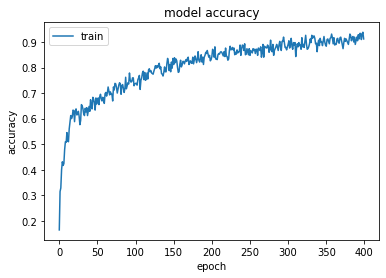

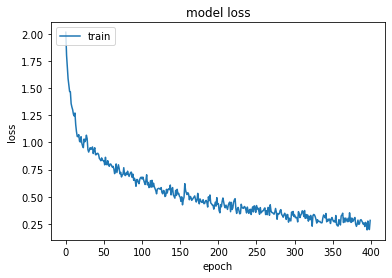

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_accuracy')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_loss')
plt.show()

In [11]:
from keras.models import load_model
model_filename = "lstm_genre_classifier_lstm.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)


Saving model: lstm_genre_classifier_lstm.sav


In [14]:
model_weights_filename = 'lstm_model_weights.h5'
print('\nSaving weights: '+ model_weights_filename)
model.save_weights(model_weights_filename)


Saving weights: lstm_model_weights.h5
